**Homework Assignment 4, problem 2.:**   
Implementing Q- Learning in OpenAI gym

 A car is on a one-dimensional track, positioned between two “mountains”. The goal is to drive up the mountain on the right; however, the car’s engine is not strong enough to scale the mountain in a single pass. Therefore, the only way to succeed is to drive back and forth to build up momentum.

Guidance: Use OpenAI gym

### Note!  This is essentially the code at:
https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f  
### I worked through it line by line and did make some small changes, but it is fundamentally the same code.  Also, the only way I found to get the car graphic to work was to do this in a Jupyter notebook no my home computer, I was not able to get the car graphic to work in a Colab notebook.
--Phil

note: the github for (this version?) of the mountain car code can be found at: https://github.com/openai/gym/blob/master/gym/envs/classic_control/mountain_car.py

In [1]:
#import necessary libraries
import gym
import matplotlib.pyplot as plt
import numpy as np
#one-time installs
#pip install gym[all]
#pip install pyglet

In [2]:
#Create environment

In [3]:
# Import and initialize Mountain Car Environment
env = gym.make('MountainCar-v0')

In [4]:
env.reset() #initialize the state of the environment

array([-0.40234485,  0.        ], dtype=float32)

In [5]:
#Test display only. Just for development testing to make sure image in aigym displays correctly
#example from: https://medium.com/@ashish_fagna/understanding-openai-gym-25c79c06eccb
#for _ in range(1000):
#    env.render()
#    env.step(env.action_space.sample()) # take a random action

In [6]:
#test example only 
print(env.step(2))

(array([-4.0223435e-01,  1.1051911e-04], dtype=float32), -1.0, False, {})


In [7]:
#Render the display.  I think this needs to be called in each step of the loop.
env.render()

True

In [8]:
#Set global data structures.  Especially Q.
#Determine size of discretized state space and initialize the Q data structure.
#https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f
num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 100])
num_states = np.round(num_states, 0).astype(int) + 1
print(num_states)
# Initialize Q table
Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
#print(Q)

[19 15]


In [14]:
#define QLearn method  This will be invoked once, but internally will loop num episodes times.

def QLearn(env):
    #set initial parameters before loop
    episodes    = 5000 #try different values for episodes 
    epsilon     = 0.8 #this will change, and is just a starting point
    min_epsilon = 0.0 #this is a threshold value that does not change during the execution of the algorithm.
    learning    = 0.2 #0.2 == initial value in example
    discount    = 0.9 #0.9 == initial value in example
    #
    #Set global data structures.  Especially Q.
    #Determine size of discretized state space and initialize the Q data structure.
    #https://towardsdatascience.com/getting-started-with-reinforcement-learning-and-open-ai-gym-c289aca874f
    num_states = (env.observation_space.high - env.observation_space.low)*np.array([10, 1000])
    num_states = np.round(num_states, 0).astype(int) + 1
    print(num_states)
    # Initialize Q table
    Q = np.random.uniform(low = -1, high = 1, size = (num_states[0], num_states[1], env.action_space.n))
    #print(Q)
    #
    reward_list = []
    ave_reward_list = []
    # Calculate episodic reduction in epsilon
    reduction = (epsilon - min_epsilon)/episodes
    for i in range(episodes):
        #print("i ==", i)
        # Initialize parameters
        done = False
        tot_reward, reward = 0,0
        state = env.reset()
        # Discretize state
        state_adj = (state - env.observation_space.low)*np.array([10, 1000])
        state_adj = np.round(state_adj, 0).astype(int)
    
        #
        done = False
        while done != True:   
            # Render environment for last five episodes
            if i >= (episodes - 20):
                #print(i)
                env.render()
                
            # Determine next action - epsilon greedy strategy
            if np.random.random() < 1 - epsilon:
                action = np.argmax(Q[state_adj[0], state_adj[1]]) 
            else:
                action = np.random.randint(0, env.action_space.n)
                
            # Get next state and reward
            state2, reward, done, info = env.step(action) 
            
            # Discretize state2
            state2_adj = (state2 - env.observation_space.low)*np.array([10, 1000])
            state2_adj = np.round(state2_adj, 0).astype(int)
            
            #Allow for terminal states
            if done and state2[0] >= 0.5:
                Q[state_adj[0], state_adj[1], action] = reward
                
            # Adjust Q value for current state
            else:
                delta = learning*(reward + discount*np.max(Q[state2_adj[0], 
                                  state2_adj[1]]) - Q[state_adj[0], 
                                  state_adj[1],action])
                Q[state_adj[0], state_adj[1],action] += delta
                                     
            # Update variables
            tot_reward += reward
            state_adj = state2_adj
        
        # Decay epsilon
        if epsilon > min_epsilon:
            epsilon -= reduction
        
        # Track rewards
        reward_list.append(tot_reward)
        
        if (i+1) % 500 == 0:
            ave_reward = np.mean(reward_list)
            ave_reward_list.append(ave_reward)
            reward_list = []
            
        if (i+1) % 500 == 0:    
            print('Episode {} Average Reward: {}'.format(i+1, ave_reward))
        #
        #
    env.close()
    return ave_reward_list

[ 19 141]
Episode 500 Average Reward: -200.0
Episode 1000 Average Reward: -200.0
Episode 1500 Average Reward: -200.0
Episode 2000 Average Reward: -200.0
Episode 2500 Average Reward: -200.0
Episode 3000 Average Reward: -199.82
Episode 3500 Average Reward: -199.424
Episode 4000 Average Reward: -198.364
Episode 4500 Average Reward: -197.712
Episode 5000 Average Reward: -195.884


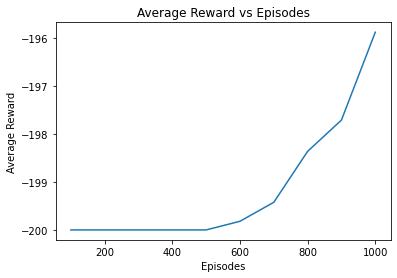

In [15]:
rewards = QLearn(env)
# Plot Rewards
plt.plot(100*(np.arange(len(rewards)) + 1), rewards)
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward vs Episodes')
plt.savefig('rewards.jpg')     
#plt.close()  